In [1]:
#pip install numpy pandas matplotlib seaborn geopandas drawarrow highlight_text pypalettes requests 

In [2]:
import geopandas as gpd
import requests
import matplotlib.pyplot as plt

/Users/babaniyiolaniyi/Documents/Documents – Babaniyi’s MacBook Pro/Babaniyi/Git/Data-visualisation/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# GeoJson

In [3]:


url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
response = requests.get(url)

gdf = gpd.read_file(response.content)
gdf.head()

,name,continent,code_sov,code_adm,geometry
0,Costa Rica,North America,CRI,CRI,"POLYGON ((-82.5462 9.56613, -82.93289 9.47681,..."
1,Nicaragua,North America,NIC,NIC,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
2,Haiti,North America,HTI,HTI,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
3,Dominican Rep.,North America,DOM,DOM,"POLYGON ((-71.7083 18.045, -71.68774 18.31666,..."
4,El Salvador,North America,SLV,SLV,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."


<Axes: >

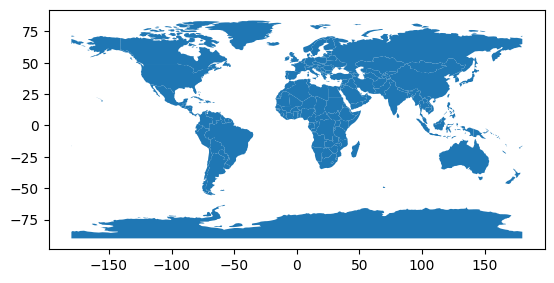

In [4]:
# Use the read_file() function of geopandas
world = gpd.read_file(response.content)
# world is now a geoDataFrame

# Call the plot() method of the geoDataFrame to get a basic map:
world.plot()

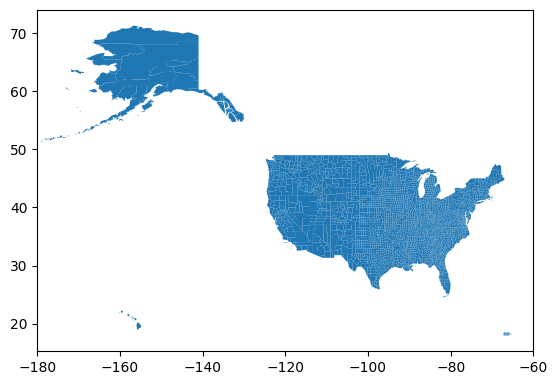

In [5]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/us-counties/us-counties.geojson"
counties = gpd.read_file(requests.get(url).content)

fig, ax = plt.subplots()
ax.set_xlim(-180, -60)

counties.plot(ax=ax)

plt.show()

## Area Selection

longitude ranges from -180 to +180 (west → east), while latitude spans -90 to +90 (south → north).

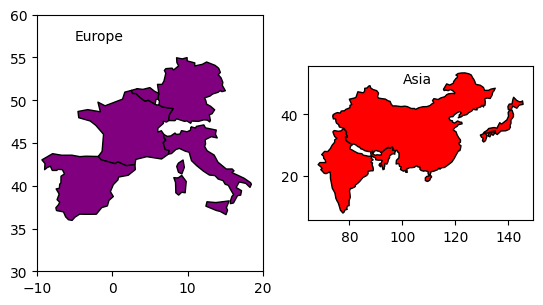

In [6]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(requests.get(url).content)

europe = world[world["name"].isin(
  ["France", "Italy", "Spain", "Belgium", "Germany"]
)]
asia = world[world["name"].isin(
  ["Japan", "China", "India"]
)]

fig, axs = plt.subplots(ncols=2)

europe.plot(ax=axs[0], color="purple", edgecolor="black")
asia.plot(ax=axs[1], color="red", edgecolor="black")

axs[0].set_xlim(-10, 20)
axs[0].set_ylim(30, 60)
axs[0].text(x=-5, y=57, s="Europe")
axs[1].text(x=100, y=50, s="Asia")

plt.show()

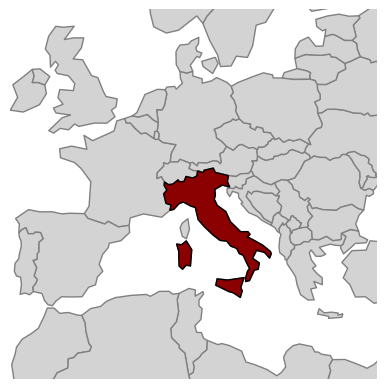

In [7]:
italy = world[world["name"]=="Italy"]

fig, ax = plt.subplots()

# first we draw all countries in grey
world.plot(color="lightgray", edgecolor="grey", ax=ax)

# then we draw Italy with a vibrant color
italy.plot(color="darkred", edgecolor="black", ax=ax)

ax.set_xlim(-10, 30)
ax.set_ylim(30, 60)
ax.axis("off")

plt.show()

# Map Projections

Ever wondered how we turn a spherical Earth into a flat map?

This is done using projections. A projection is basically a mathematical transformations that "flatten" the globe.

No projection is perfect. Some preserve shape, others preserve area, but none can do it all at once.

To change the default projection, use cartopy, a powerful library for map visualization.

Cartopy provides a crs (coordinate reference system) object that lists common projections. You can apply a new projection to a GeoDataFrame using its to_crs() method:

In [10]:
import cartopy.crs as ccrs

/Users/babaniyiolaniyi/Documents/Documents – Babaniyi’s MacBook Pro/Babaniyi/Git/Data-visualisation/.venv/lib/python3.9/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


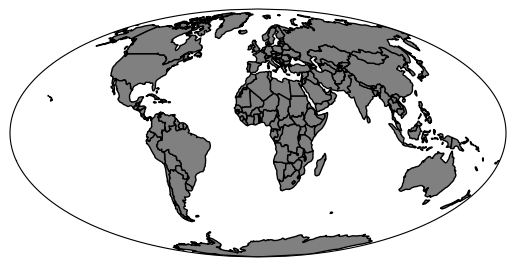

In [12]:
# create the projection variable
#projection = ccrs.ObliqueMercator()
projection = ccrs.Mollweide()

# convert our dataframe to our new projection
world_proj = world.to_crs(projection.to_proj4())

# specify that we want to use a custom projection
fig, ax = plt.subplots(
  subplot_kw={"projection": projection}
)

world_proj.plot(color="gray", edgecolor="black", ax=ax)

plt.show()